# Benchmark visualizer

This notebook compares everyone's code performance.

In [46]:
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns

import compare

def get_day(n : int) -> pd.DataFrame:
    return pd.DataFrame(compare.generate_day(n))

def plot_day(day: int, log_scale=False, violin=False):
    df = get_day(day)

    # unit detection
    if df["time"].max() < 1:
        unit = "ms"
        scale = 1000
    else:
        unit = "s"
        scale = 1

    # mutate in-place; nothing outside depends on it
    df["time_plot"] = df["time"] * scale
    df["author_lang"] = df["author"].str.capitalize() + " in " + df["lang"]

    fig, ax = plt.subplots(figsize=(13, 8))

    plot_func = sns.violinplot if violin else sns.boxplot
    plot_func(
        data=df,
        x="part",
        y="time_plot",
        hue="author_lang",
        ax=ax
    )

    if log_scale:
        ax.set_yscale("log")
        ax.yaxis.set_major_locator(mticker.LogLocator(base=10, numticks=50))
        ax.yaxis.set_minor_locator(mticker.LogLocator(base=10, subs=range(1, 10)))

        for y in ax.get_yticks(minor=True):
            if y > 0 and ax.get_ylim()[0] <= y <= ax.get_ylim()[1]:
                ax.axhline(y, linestyle="--", linewidth=0.4, color="gray")
    else:
        ax.set_ylim(bottom=0)
    
        # double the density: add minor ticks at midpoints
        ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    
        # draw major + minor lines
        for y in ax.get_yticks():
            ax.axhline(y, linestyle="--", linewidth=0.6, color="gray")
        for y in ax.get_yticks(minor=True):
            ax.axhline(y, linestyle="--", linewidth=0.4, color="gray")

    ax.set_xlabel("Puzzle Part")
    ax.set_ylabel(f"Execution Time ({unit})")
    ax.set_title(f"Advent of Code benchmarks day {day}")

    ax.legend(title="Made by")
    plt.tight_layout()
    plt.savefig(f"img/day{day}.png")
    plt.show()


## Day 1

This puzzle incorporated a dial and counting the number of clicks on each dial.

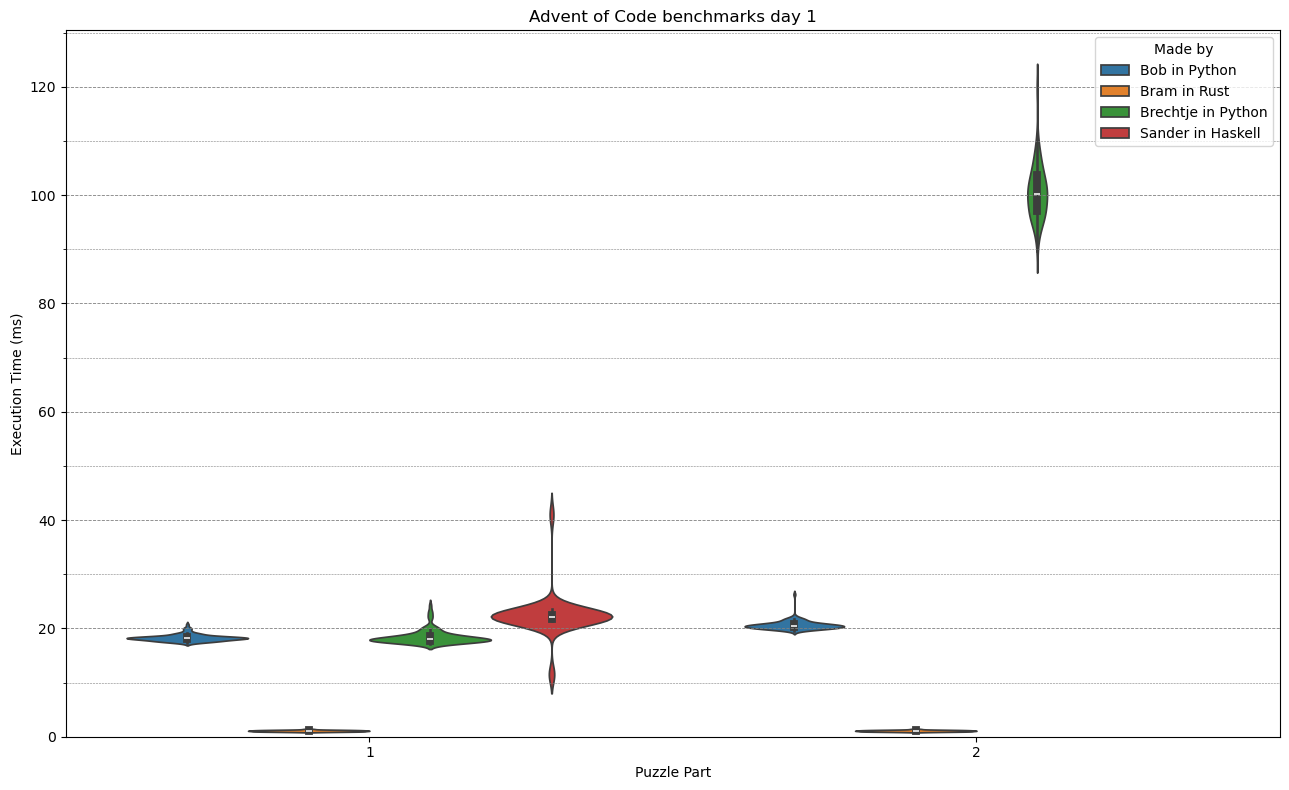

In [52]:
plot_day(1, log_scale=False, violin=True)